# Bank Marketing Data Set

## Descripcion del data set:

Los datos están relacionados con campañas de marketing de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. Con el fin de determinar si el producto (depósito a plazo bancario) estaría o no suscrito.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Se hara un pre-procesameinto de los datos y un analsis EDA para entender el comportamiento de estos y tomar decisiones en cuanto a los posibles metodos de Machine Learning (ML) que se puedan utilizar.

Se cargan las librerias, el archivo y se otiene el tamaño del dataset:

In [247]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline

bank_data = pd.read_csv("dataset/bank.csv")

[Instances,features] = bank_data.shape
print("Instances count = ",Instances)
print("Features count = ",features)

Instances count =  4521
Features count =  17


In [248]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Se puede observar que existen diferentes tipos de datos en el dataset, los que son puramente numéricos y otros que son strings de tipo "object", como se muestra a continuación:

In [249]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Se tiene tambien, que los features "default, housing, loan, contact e
y" son de tipo objecto y de caracter binario ya que corresponde a preguntas de "yes" o "no", o tiene solo dos posibles valores como "cellular y telephone". Por lo que se procede a cambiar los "yes" por "1" y los "no" por 0", al igual que "cellular" por "1" y "telephono" por "0".

In [251]:
bank_data.replace(to_replace='yes', value = 1, inplace = True)
bank_data.replace(to_replace='no', value = 0, inplace = True)
bank_data.replace(to_replace='cellular', value = 1, inplace = True)
bank_data.replace(to_replace='telephone', value = 0, inplace = True)

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,1,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,1,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,1,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [252]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

Como se puede observar, los valores de los features "default, housing, loan e
y" cambiaron a valores de 0 y 1, y ahora son de tipo int64. Pero contact sigue siendo de tipo object, porque tiene valores desconocidos. Si se analiza la cantidad de valores por categoria se tiene:

In [253]:
bank_data.contact.value_counts()

1          2896
unknown    1324
0           301
Name: contact, dtype: int64

Se tiene que el valor mas recurrente es el 1, por lo que podemos cambiar los valores "unknown" por 1.

In [254]:
bank_data.contact.replace(to_replace='unknown', value = 1, inplace = True)
bank_data.contact.value_counts()

1    4220
0     301
Name: contact, dtype: int64

In [255]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

Como se observa se tiene ahora el feature "contact" como tipo int64 y sin valores desconocidos.

El feature month puede tener solamente 12 valores posibles, por lo que se pueden cambiar los valores por su respectivo número de mes.

In [256]:
bank_data.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

Se procede a cambiar cada nombre de mes por el número correspondiente en el calendario. Para el cual se puede crear un diccionario con el mapeo correspondiente:

In [257]:
month_nums = {"month": {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul":7, 
                        "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec":12 }}
bank_data.replace(month_nums, inplace=True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,1,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,1,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,1,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,1,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,1,5,5,226,1,-1,0,unknown,0


In [258]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

Se tiene que ahora el feature month es numérico.

Con esta información se puede dividir el dataset en dos grupos distitos, uno solo para los tipos numéricos:

In [259]:
int_bank_data = bank_data.select_dtypes(include=['int64']).copy()
int_bank_data.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,0,1787,0,0,1,19,10,79,1,-1,0,0
1,33,0,4789,1,1,1,11,5,220,1,339,4,0
2,35,0,1350,1,0,1,16,4,185,1,330,1,0
3,30,0,1476,1,1,1,3,6,199,4,-1,0,0
4,59,0,0,1,0,1,5,5,226,1,-1,0,0


 y otro para los tipos objecto:

In [260]:
obj_bank_data = bank_data.select_dtypes(include=['object']).copy()
obj_bank_data.head()

,job,marital,education,poutcome
0,unemployed,married,primary,unknown
1,services,married,secondary,failure
2,management,single,tertiary,failure
3,management,married,tertiary,unknown
4,blue-collar,married,secondary,unknown


Los tipos de datos numéricos se analizarán mediante análisis estidístico posteriormente, primero se hará el análisis de los datos tipo object:

Estos datos al no ser numéricos representan una dificultad extra, debido a que se deben "mapear" a datos numéricos para poder ser procesados por lo algoritmos de ML.

Una de las primeras cosas que se necesitan hacer es revisar si existen valores nulos o desconocidos en los features:

In [261]:
for feature in obj_bank_data:
    if np.any([obj_bank_data[feature] == "unknown"]):
        print("There are 'unknown' values on feature: ",feature)

obj_bank_data[obj_bank_data.isnull().any(axis=1)]

There are 'unknown' values on feature:  job
There are 'unknown' values on feature:  education
There are 'unknown' values on feature:  poutcome


,job,marital,education,poutcome


Como se observa, existen valores desconocidos pero no existen valores nulos en los features. Los valores desconocidos se pueden tratar como valores validos para los features "job" y "education", como una categoria mas para cada feature segun la informacion del dataset. No asi para el feature "poutcome":

* _job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','**unknown**')_
* _education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','**unknown**')_
* _poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')_

Se analiza este feature como tal:

In [263]:
obj_bank_data.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

Como se observa la cantidad de valores desconocidos son muy altos respecto a los otros valores, por lo cual se considera eliminar este feature del análisis.

In [264]:
obj_bank_data.drop(columns=['poutcome'], inplace = True)
obj_bank_data.head()

,job,marital,education
0,unemployed,married,primary
1,services,married,secondary
2,management,single,tertiary
3,management,married,tertiary
4,blue-collar,married,secondary


Los features "job, marital y education" tienen bastantes categorias y no pueden ser representadas numéricamente como en el caso del feature month ya que puede haber una mala interpretación de los algorítmos de ML. Por lo que estos features se pueden manejar mediante **One Hot Encoding**.

Para esto se utiliza el método de pandas llamado _get_dummies_.

In [265]:
obj_bank_data_one_hot = pd.get_dummies(obj_bank_data, columns=["job","marital","education"])
obj_bank_data_one_hot.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Se puede observar que se crean nuevos features con valores de 0 y 1, donde ahora todos los features son numéricos:

In [266]:
obj_bank_data_one_hot.dtypes

job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
dtype: object

Con los datos que son puramente numéricos y no binarios, se procede a buscar outliers:

In [268]:
int_bank_data.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,0,1787,0,0,1,19,10,79,1,-1,0,0
1,33,0,4789,1,1,1,11,5,220,1,339,4,0
2,35,0,1350,1,0,1,16,4,185,1,330,1,0
3,30,0,1476,1,1,1,3,6,199,4,-1,0,0
4,59,0,0,1,0,1,5,5,226,1,-1,0,0


Se buscan los valores máximo, mínimo, promedio y mediana de cada feature, y se analiza su distribución:

For feature:  age
	Mean:  41.17009511170095
	Median:  39
	Max:  87
	Min:  19
For feature:  balance
	Mean:  1422.6578190665782
	Median:  444
	Max:  71188
	Min:  -3313
For feature:  day
	Mean:  15.915284229152842
	Median:  16
	Max:  31
	Min:  1
For feature:  duration
	Mean:  263.96129174961294
	Median:  185
	Max:  3025
	Min:  4
For feature:  campaign
	Mean:  2.793629727936297
	Median:  2
	Max:  50
	Min:  1
For feature:  pdays
	Mean:  39.766644547666445
	Median:  -1
	Max:  871
	Min:  -1


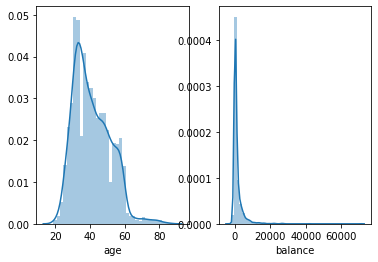

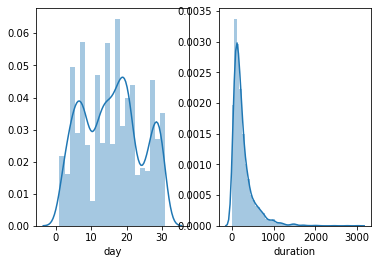

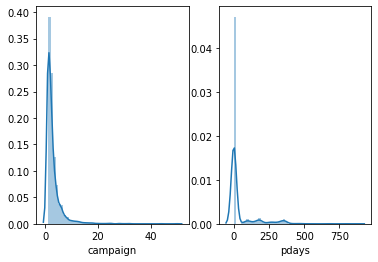

In [269]:
features = ["age", "balance", "day", "duration", "campaign", "pdays"]

for ft in features:
    print("For feature: ",ft)
    print("\tMean: ",st.mean(int_bank_data[ft]))
    print("\tMedian: ",st.median(int_bank_data[ft]))
    print("\tMax: ",np.max(int_bank_data[ft]))
    print("\tMin: ",np.min(int_bank_data[ft]))
    
f0, axes0 = plt.subplots(1, 2)
sns.distplot(int_bank_data["age"],ax=axes0[0])
sns.distplot(int_bank_data["balance"],ax=axes0[1])

f1, axes1 = plt.subplots(1, 2)
sns.distplot(int_bank_data["day"],ax=axes1[0])
sns.distplot(int_bank_data["duration"],ax=axes1[1])

f2, axes2 = plt.subplots(1, 2)
sns.distplot(int_bank_data["campaign"],ax=axes2[0])
sns.distplot(int_bank_data["pdays"],ax=axes2[1])

De estos datos y de las gráficas de distribución, se tiene que los features "age" y "day" poseen datos dentro de los esperado según la información del dataset. Features como el "balance" y "campaign" poseen muchos outlier y la información no es clara acerca de estos features por lo que se van a eliminar esos outliers. "pdays y duration" son features que poseen valores muy distantes entre si, pero si están dentro de lo esperado.

Para solucionar el problema de outliers se implementará la regla 3$\sigma$.

In [270]:
features = ["balance", "campaign"]

for ft in features:
    print("For feature: ",ft)
    mean = st.mean(int_bank_data[ft])
    std = np.std(int_bank_data[ft])
    
    
    for i in range(len(int_bank_data[ft])):
        if (int_bank_data[ft][i] < mean - 3*std) or (int_bank_data[ft][i] > mean + 3*std):
                   int_bank_data[ft][i] = mean
            
    print("\tMean: ",st.mean(int_bank_data[ft]))
    print("\tMedian: ",st.median(int_bank_data[ft]))
    print("\tMax: ",np.max(int_bank_data[ft]))
    print("\tMin: ",np.min(int_bank_data[ft]))


For feature:  balance
	Mean:  1121.9323158593231
	Median:  444
	Max:  10378
	Min:  -3313
For feature:  campaign
	Mean:  2.4733466047334662
	Median:  2
	Max:  12
	Min:  1


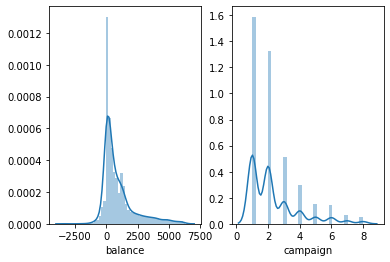

In [245]:
f0, axes0 = plt.subplots(1, 2)
sns.distplot(int_bank_data["balance"],ax=axes0[0])
sns.distplot(int_bank_data["campaign"],ax=axes0[1])


Con esto se tiene que el comportamiento de estos features se acerca a una **distribución normal** por lo que se recomienda utilizar métodosde ML basasdos matematicamente en distribuciones normales.

Ahora procedemos a unir los dos datasets numéricos, ```int_bank_data``` y ```obj_bank_data_one_hot```

In [271]:
numeric_bank_data = pd.concat([int_bank_data, obj_bank_data_one_hot], axis=1)
numeric_bank_data.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,30,0,1787,0,0,1,19,10,79,1,...,0,1,0,0,1,0,1,0,0,0
1,33,0,4789,1,1,1,11,5,220,1,...,0,0,0,0,1,0,0,1,0,0
2,35,0,1350,1,0,1,16,4,185,1,...,0,0,0,0,0,1,0,0,1,0
3,30,0,1476,1,1,1,3,6,199,4,...,0,0,0,0,1,0,0,0,1,0
4,59,0,0,1,0,1,5,5,226,1,...,0,0,0,0,1,0,0,1,0,0


### Con esto se tiene un dataset listo para ser procesado